In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')
import os

In [225]:
os.chdir(r'C:\Users\Dell\Desktop\Data Science\Projects\Loan Prediction')

In [421]:
train_df = pd.read_csv('train_ctrUa4K.csv')
test_df = pd.read_csv('test_lAUu6dG.csv')

In [422]:
train_original = train_df.copy()
test_original = test_df.copy()

In [423]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [424]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [425]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

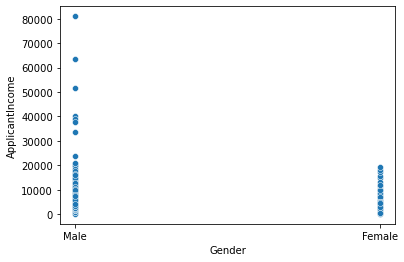

In [546]:
sns.scatterplot(x= 'Gender', y= 'ApplicantIncome', data = train_df)

In [426]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


## EDA

In [427]:
train_df.Loan_Status.value_counts(), train_df.Loan_Status.value_counts(normalize = True)

(Y    422
 N    192
 Name: Loan_Status, dtype: int64,
 Y    0.687296
 N    0.312704
 Name: Loan_Status, dtype: float64)

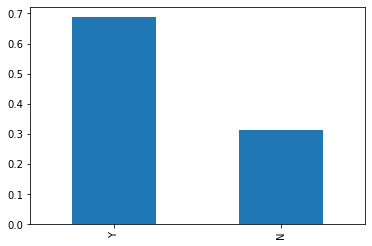

In [428]:
train_df.Loan_Status.value_counts(normalize = True).plot.bar()
plt.show()

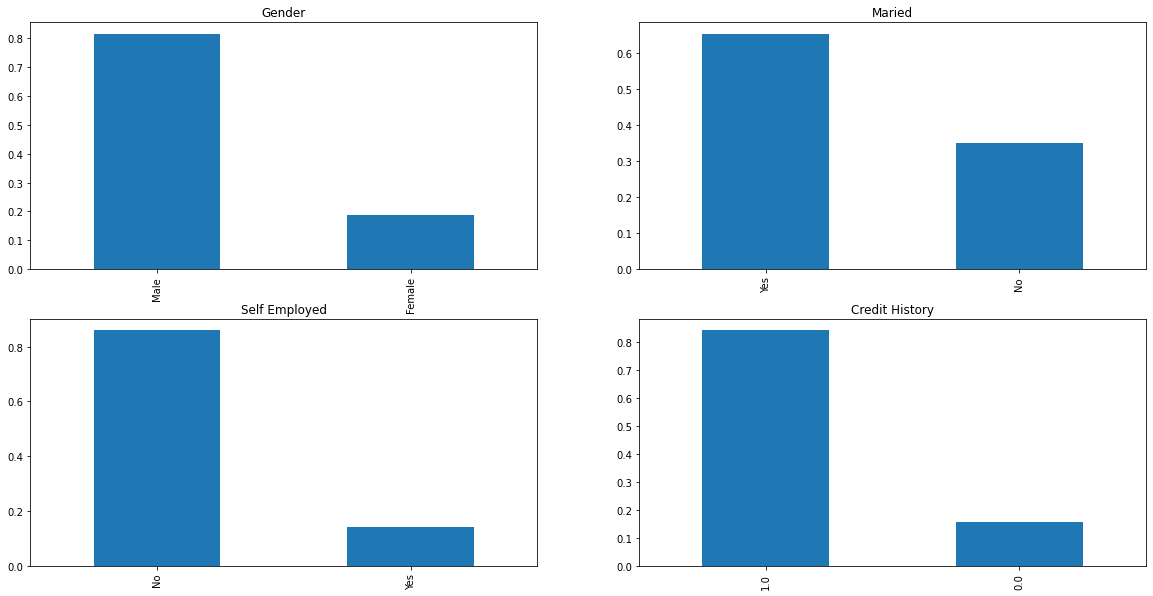

In [429]:
plt.figure(1),
plt.subplot(221)
train_df['Gender'].value_counts(normalize = True).plot.bar(figsize = (20, 10), title = 'Gender')
plt.subplot(222)
train_df['Married'].value_counts(normalize = True).plot.bar(figsize = (20, 10), title = 'Maried')
plt.subplot(223)
train_df['Self_Employed'].value_counts(normalize = True).plot.bar(figsize = (20, 10), title = 'Self Employed')
plt.subplot(224)
train_df['Credit_History'].value_counts(normalize = True).plot.bar(figsize = (20, 10), title = 'Credit History')
plt.show()

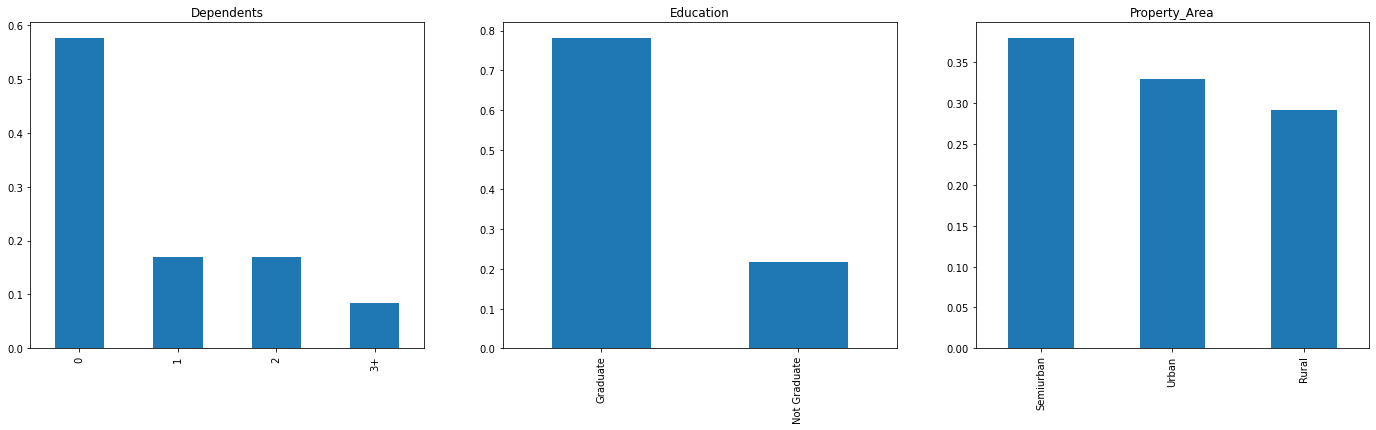

In [430]:
plt.figure(1)
plt.subplot(131)
train_df['Dependents'].value_counts(normalize = True).plot.bar(figsize = (24,6), title = 'Dependents')
plt.subplot(132)
train_df['Education'].value_counts(normalize = True).plot.bar(title = 'Education')
plt.subplot(133)
train_df['Property_Area'].value_counts(normalize = True).plot.bar(title = 'Property_Area')
plt.show()

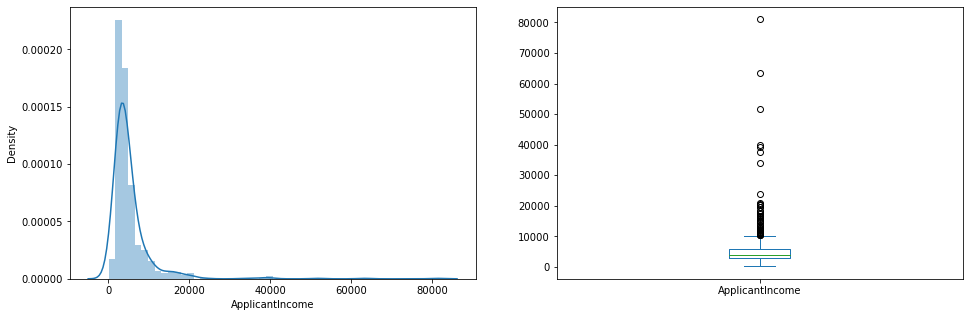

In [236]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['ApplicantIncome']);
plt.subplot(122)
train_df['ApplicantIncome'].plot.box(figsize = (16,5))
plt.show()

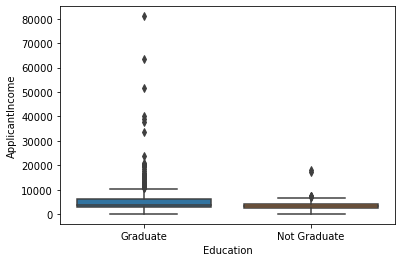

In [237]:
sns.boxplot(y= train_df['ApplicantIncome'], x= train_df['Education'])
plt.show()

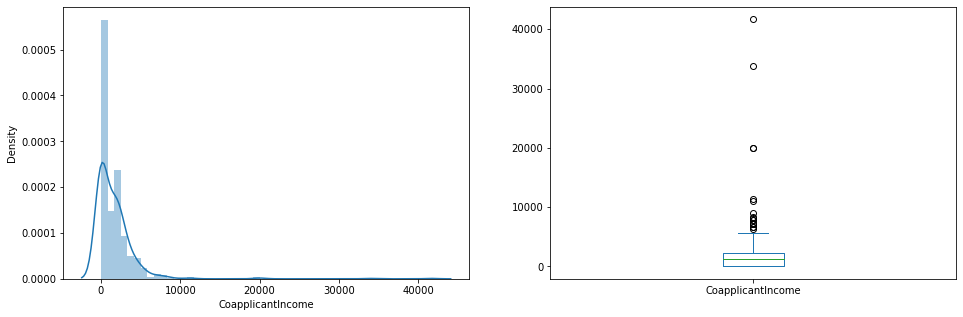

In [238]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['CoapplicantIncome']); 
plt.subplot(122)
train_df['CoapplicantIncome'].plot.box(figsize = (16,5))
plt.show()

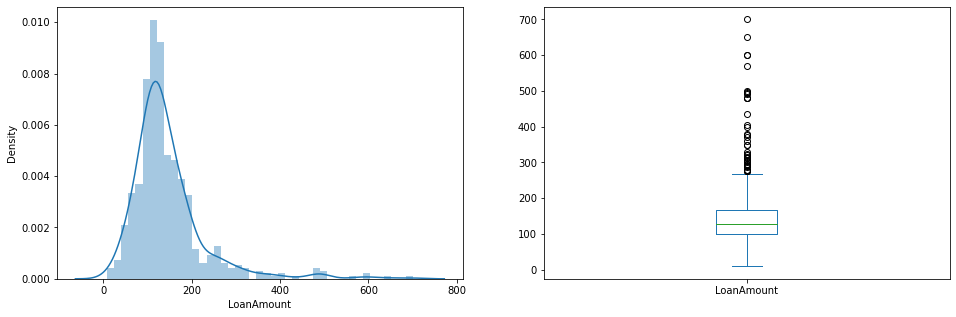

In [239]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['LoanAmount'])
plt.subplot(122)
train_df['LoanAmount'].plot.box(figsize = (16,5))
plt.show()

In [18]:
# Categorical Features and Target Variable

In [431]:
Gender = pd.crosstab(train_df['Gender'], train_df['Loan_Status'])

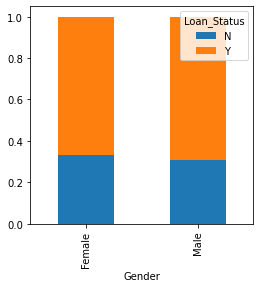

In [432]:
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))
plt.show()

In [105]:
Married = pd.crosstab(train_df['Married'], train_df['Loan_Status'])
Dependents = pd.crosstab(train_df['Dependents'], train_df['Loan_Status'])
Education = pd.crosstab(train_df['Education'], train_df['Loan_Status'])
Self_Employed = pd.crosstab(train_df['Self_Employed'], train_df['Loan_Status'])

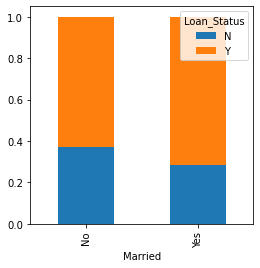

In [242]:
Married.div(Married.sum(1).astype(float), axis = 0).plot.bar(stacked = True, figsize = (4,4))
plt.show()

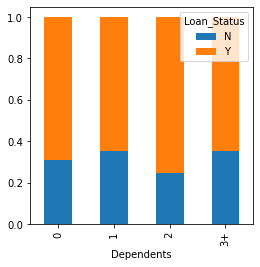

In [243]:
Dependents.div(Dependents.sum(1).astype(float), axis = 0).plot.bar(stacked = True, figsize = (4,4))
plt.show()

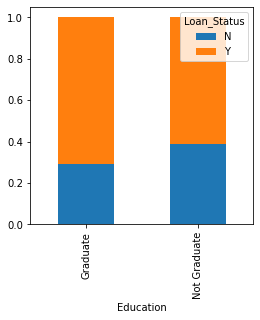

In [244]:
Education.div(Education.sum(1).astype(float), axis = 0).plot.bar(stacked = True, figsize = (4,4))
plt.show()

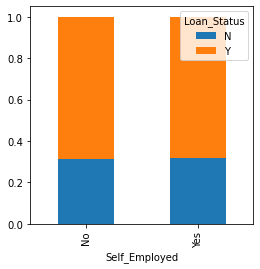

In [245]:
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot.bar(stacked = True, figsize = (4,4))
plt.show()

In [26]:
# Numerical Independent Features vs Target Variable

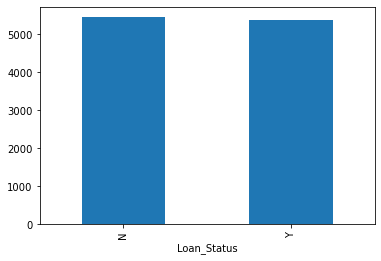

In [433]:
train_df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()

In [434]:
# Binning the applicant incomes

bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']

train_df['Income_bin'] = pd.cut(train_df['ApplicantIncome'], bins, labels = group)

In [435]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High


In [436]:
income_bin = pd.crosstab(train_df['Income_bin'], train_df['Loan_Status'])

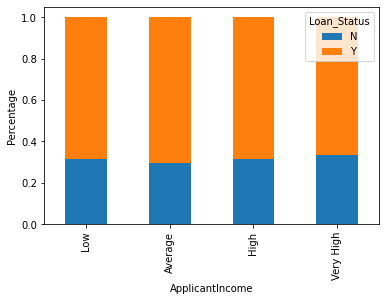

In [437]:
income_bin.div(income_bin.sum(1).astype(float), axis = 0).plot.bar(stacked = True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.show()

In [438]:
bins = [0, 1000, 3000, 42000]
group = ['Low', 'Average', 'High']
train_df['Coapplicant_Income_Bins'] = pd.cut(train_df['CoapplicantIncome'], bins, labels = group)

In [439]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_Bins
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN


In [440]:
Coapplicant_Income_Bins = pd.crosstab(train_df['Coapplicant_Income_Bins'], train_df['Loan_Status'])

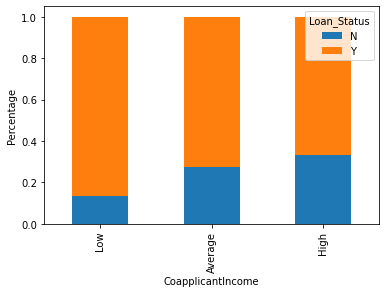

In [441]:
Coapplicant_Income_Bins.div(Coapplicant_Income_Bins.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')
plt.show()

In [442]:
train_df['Total_Income'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']

In [443]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_Bins,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0


In [444]:
bins = [0, 2500, 4000, 6000, 81000]
groups = ['Low', 'Average', 'High', 'Very High']
train_df['Total_Income_bins'] = pd.cut(train_df['Total_Income'], bins, labels = groups)

In [445]:
Total_income = pd.crosstab(train_df['Total_Income_bins'], train_df['Loan_Status'])

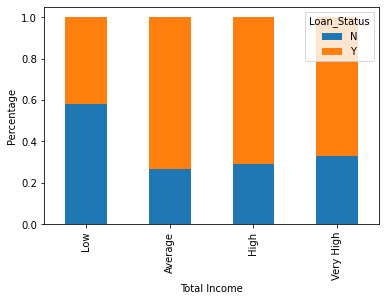

In [446]:
Total_income.div(Total_income.sum(1).astype(float), axis = 0).plot.bar(stacked = True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')
plt.show()

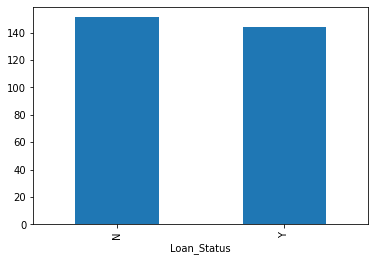

In [447]:
# Exploring the loan amount variable and target variable
train_df.groupby('Loan_Status')['LoanAmount'].mean().plot.bar()
plt.show()

In [261]:
train_df['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [448]:
# Binning loan amount
bins = [0, 100, 200, 700]
group = ['Low', 'Average', 'High']
train_df['Loan_Amount_Bin'] = pd.cut(train_df['LoanAmount'], bins, labels = group)

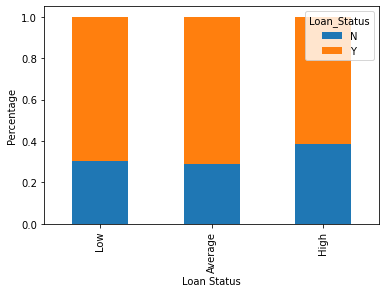

In [449]:
# Crosstab for Loan Amount and Loan Status
Loan_Amount = pd.crosstab(train_df['Loan_Amount_Bin'], train_df['Loan_Status'])
Loan_Amount.div(Loan_Amount.sum(1).astype(float), axis = 0).plot.bar(stacked = True)
plt.xlabel('Loan Status')
plt.ylabel('Percentage')
plt.show()

In [450]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_Bins,Total_Income,Total_Income_bins,Loan_Amount_Bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very High,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,High,Average


In [452]:
# Dropping bins created for exploration purposes
train_df.drop(['Loan_ID','Loan_Amount_Bin', 'Total_Income', 'Total_Income_bins', 'Coapplicant_Income_Bins', 'Income_bin'], axis = 1, inplace = True)
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [453]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [454]:
test_df.drop('Loan_ID', axis = 1, inplace = True)

In [455]:
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [50]:
# Replacing categorical with numerical

In [456]:
mapping_ls = {
    'N':0,
    'Y':1
}

In [457]:
mapping_d = {
    '0': 0,
    '1': 1,
    '2': 2,
    '3+': 3
}

In [458]:
train_df['Loan_Status'] = train_df['Loan_Status'].map(mapping_ls)

In [459]:
train_df['Dependents'] = train_df['Dependents'].map(mapping_d)

In [460]:
test_df['Dependents'] = test_df['Dependents'].map(mapping_d)

In [461]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [462]:
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [54]:
# Checking correlation between numerical features and target

In [463]:
matrix = train_df.corr()

In [464]:
matrix

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Dependents,1.000000,0.118679,0.027259,0.163997,-0.100484,-0.050082,0.006781
ApplicantIncome,0.118679,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,0.027259,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.163997,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.100484,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.050082,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,0.006781,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


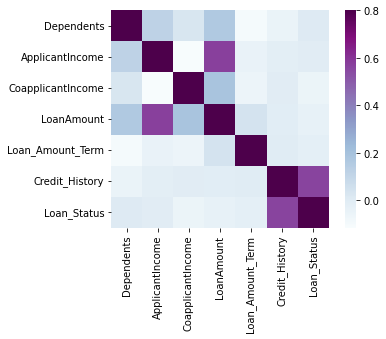

In [280]:
sns.heatmap(matrix, vmax = .8, square = True, cmap = 'BuPu')
plt.show()

In [58]:
# Missing Values Imputation


In [465]:
train_df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [466]:
# Creating a function that replaces null values in the categorical values with mode
def rep_na(feature,dataframe):
    """
    Replaces NAs with the mode of the feature
    """
    dataframe[feature] = dataframe[feature].fillna(dataframe[feature].mode()[0])

In [61]:
# filling na of the categorical features

In [467]:
rep_na('Gender', train_df)
rep_na('Married', train_df)
rep_na('Dependents', train_df)
rep_na('Self_Employed', train_df)
rep_na('Credit_History', train_df)

In [63]:
# Filling na values for numerical features

In [468]:
train_df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [469]:
# Looks like the 360 appeared many times. Replacing na in Loan Amount variable with 360
rep_na('Loan_Amount_Term', train_df)

In [66]:
# Loan Amount is skewed so replacing with median

In [470]:
train_df['LoanAmount'] = train_df['LoanAmount'].fillna(train_df['LoanAmount'].median())

In [471]:
train_df['LoanAmount'].dtype

dtype('float64')

In [69]:
# Next Steps
# Remove Na in test data
# Deal wit outliers
# Build model

In [70]:
#Remove na in test dataset

In [472]:
rep_na('Gender', test_df)
rep_na('Married', test_df)
rep_na('Dependents', test_df)
rep_na('Self_Employed', test_df)
rep_na('Credit_History', test_df)


In [473]:
test_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

In [474]:
test_df['Loan_Amount_Term'].value_counts()

360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [74]:
# Looks like the 360 appeared many times. Replacing na in Loan Amount variable with 360

In [475]:
rep_na('Loan_Amount_Term', test_df)

In [476]:
test_df['LoanAmount'] = test_df['LoanAmount'].fillna(test_df['LoanAmount'].median())

In [478]:
train_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [479]:
test_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

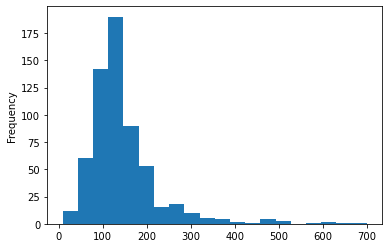

In [480]:
train_df['LoanAmount'].plot.hist(bins = 20)
plt.show()

In [481]:
train_df['LoanAmount_log'] = np.log(train_df['LoanAmount'] + 1)

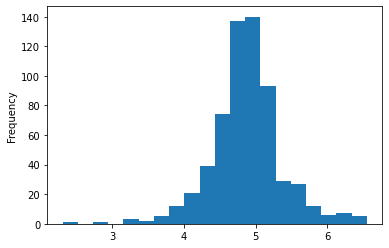

In [482]:
train_df['LoanAmount_log'].plot.hist(bins = 20)
plt.show()

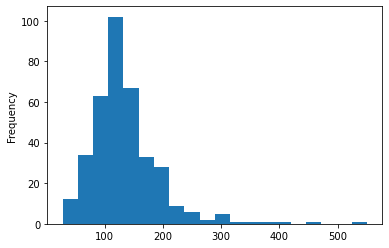

In [483]:
test_df['LoanAmount'].plot.hist(bins=20)
plt.show()

In [484]:
test_df['LoanAmount_log'] = np.log(test_df['LoanAmount'] + 1)

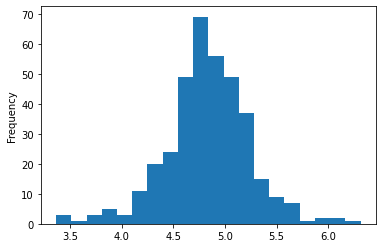

In [169]:
test_df['LoanAmount_log'].plot.hist(bins=20)
plt.show()

In [485]:
train_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log'],
      dtype='object')

In [486]:
# Dropping loan Amount since we have a log transformed version of Loan Amount
X = train_df.drop(['Loan_Status', 'LoanAmount'], axis = 1)
y = train_df['Loan_Status']

In [487]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,No,0.0,Graduate,No,5849,0.0,360.0,1.0,Urban,4.859812
1,Male,Yes,1.0,Graduate,No,4583,1508.0,360.0,1.0,Rural,4.859812
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,4.204693
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,4.795791
4,Male,No,0.0,Graduate,No,6000,0.0,360.0,1.0,Urban,4.955827


In [488]:
X = pd.get_dummies(X)
X.shape

(614, 17)

In [489]:
X.isna().sum()

Dependents                 0
ApplicantIncome            0
CoapplicantIncome          0
Loan_Amount_Term           0
Credit_History             0
LoanAmount_log             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [517]:
# rescale the numerical feature in training data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X) 

In [ ]:
# Preprocessing Test Data

In [491]:
# Dropping loan Amount since we have a log transformed version of Loan Amount
X_test = test_df.drop('LoanAmount', axis = 1)

In [493]:
X_test = pd.get_dummies(X_test)
X_test.shape

(367, 17)

In [518]:
# Rescaling X test to test the model
X_test_scaled= scaler.fit_transform(X_test)

In [ ]:
# Model building

In [519]:
# Splitting Data into training and validation set
X_train, x_cv, y_train, y_cv = train_test_split(X_scaled, y, test_size = 0.2, random_state= 25, stratify = y)

In [520]:
X_train

array([[0.66666667, 0.04155844, 0.10598315, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.02906617, 0.47999616, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.02054422, 0.03998368, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.05998763, 0.06098351, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.03721707, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.66666667, 0.0142115 , 0.02606379, ..., 0.        , 0.        ,
        1.        ]])

In [521]:
x_cv

array([[0.        , 0.03546073, 0.01591187, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.06204082, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.03233148, 0.03501572, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.66666667, 0.03915894, 0.08399933, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.07737786, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.05804576, 0.09134327, ..., 0.        , 1.        ,
        0.        ]])

In [498]:
y_train

327    1
207    1
432    1
589    0
114    1
      ..
605    0
378    0
222    1
298    0
463    1
Name: Loan_Status, Length: 429, dtype: int64

In [499]:
y_cv

273    1
123    1
480    1
455    1
425    1
      ..
374    1
462    1
127    1
102    1
451    1
Name: Loan_Status, Length: 185, dtype: int64

In [500]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [522]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

list

In [523]:
# Getting the coefficients of the features
feature_names= X.columns.tolist()
coeffs = model.coef_[0]
feature_coeffs = dict(zip(feature_names, coeffs))

In [524]:
# Checking coefficients of features in the model
feature_coeffs

{'Dependents': 0.1452975347636484,
 'ApplicantIncome': 0.4890971624354153,
 'CoapplicantIncome': -0.8506388122114268,
 'Loan_Amount_Term': 0.02231598961846619,
 'Credit_History': 3.275697379661709,
 'LoanAmount_log': -0.6455562591678002,
 'Gender_Female': -0.02650109971310269,
 'Gender_Male': 0.02658873368156511,
 'Married_No': -0.34719149452558523,
 'Married_Yes': 0.3472791284940484,
 'Education_Graduate': 0.19746744350590292,
 'Education_Not Graduate': -0.19737980953743914,
 'Self_Employed_No': 0.09169738260240312,
 'Self_Employed_Yes': -0.09160974863394046,
 'Property_Area_Rural': -0.2988975857532581,
 'Property_Area_Semiurban': 0.45482949862097904,
 'Property_Area_Urban': -0.15584427889925886}

In [525]:
predict_cv = model.predict(x_cv)

In [526]:
accuracy_score(y_cv, predict_cv)

0.8211382113821138

In [536]:
predicted_xtest = model.predict(X_test)

In [ ]:
# Submitting the model for scores on the leader board

In [529]:
submission = pd.read_csv("sample_submission_49d68Cx.csv")

In [530]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [537]:
submission['Loan_Status'] = predicted_xtest

In [538]:
submission['Loan_ID'] = test_original['Loan_ID']

In [540]:
submission['Loan_Status'].replace(0, 'N', inplace = True)
submission['Loan_Status'].replace(1, 'Y', inplace = True)

In [541]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,Y


In [206]:
submission['Loan_Status'].value_counts()

Yes    304
No      63
Name: Loan_Status, dtype: int64

In [542]:
submission.to_csv('jibril_submission.csv', index = False)